In [ ]:
!pip install -U sentence-transformers
!pip install umap-learn[plot]
!pip install datasets

In [ ]:
import umap
import umap.plot
import numpy as np
import pandas as pd

from sentence_transformers import SentenceTransformer, models, util
from datasets import load_dataset

In [ ]:
# Load models
bert = models.Transformer('textattack/bert-base-uncased-STS-B', max_seq_length=128)
bert_pooling = models.Pooling(bert.get_word_embedding_dimension())
sbert = SentenceTransformer(modules=[bert, bert_pooling])

albert = models.Transformer('textattack/albert-base-v2-STS-B', max_seq_length=128)
albert_pooling = models.Pooling(albert.get_word_embedding_dimension())
salbert = SentenceTransformer(modules=[albert, albert_pooling])

In [ ]:
# Download dataset
dataset = load_dataset('ag_news', split='train')

In [ ]:
df = pd.DataFrame(dataset)
df

,label,text
0,2,Wall St. Bears Claw Back Into the Black (Reute...
1,2,Carlyle Looks Toward Commercial Aerospace (Reu...
2,2,Oil and Economy Cloud Stocks' Outlook (Reuters...
3,2,Iraq Halts Oil Exports from Main Southern Pipe...
4,2,"Oil prices soar to all-time record, posing new..."
...,...,...
119995,0,Pakistan's Musharraf Says Won't Quit as Army C...
119996,1,Renteria signing a top-shelf deal Red Sox gene...
119997,1,Saban not going to Dolphins yet The Miami Dolp...
119998,1,Today's NFL games PITTSBURGH at NY GIANTS Time...


In [ ]:
%time sbert_embeddings = sbert.encode(df['text'])

CPU times: user 5min 25s, sys: 3min 24s, total: 8min 49s
Wall time: 8min 37s


In [ ]:
%time sbert_mapper = umap.UMAP(random_state=0, transform_seed=0, n_neighbors=15, min_dist=0.1, metric='cosine').fit(sbert_embeddings)

CPU times: user 3min 58s, sys: 5.75 s, total: 4min 4s
Wall time: 3min 19s


In [ ]:
%time salbert_embeddings = salbert.encode(df['text'])

CPU times: user 6min 26s, sys: 4min 4s, total: 10min 30s
Wall time: 10min 12s


In [ ]:
%time salbert_mapper = umap.UMAP(random_state=0, transform_seed=0, n_neighbors=15, min_dist=0.1, metric='cosine').fit(salbert_embeddings)

CPU times: user 3min 46s, sys: 6.39 s, total: 3min 52s
Wall time: 3min 8s


# STS-B on AG News

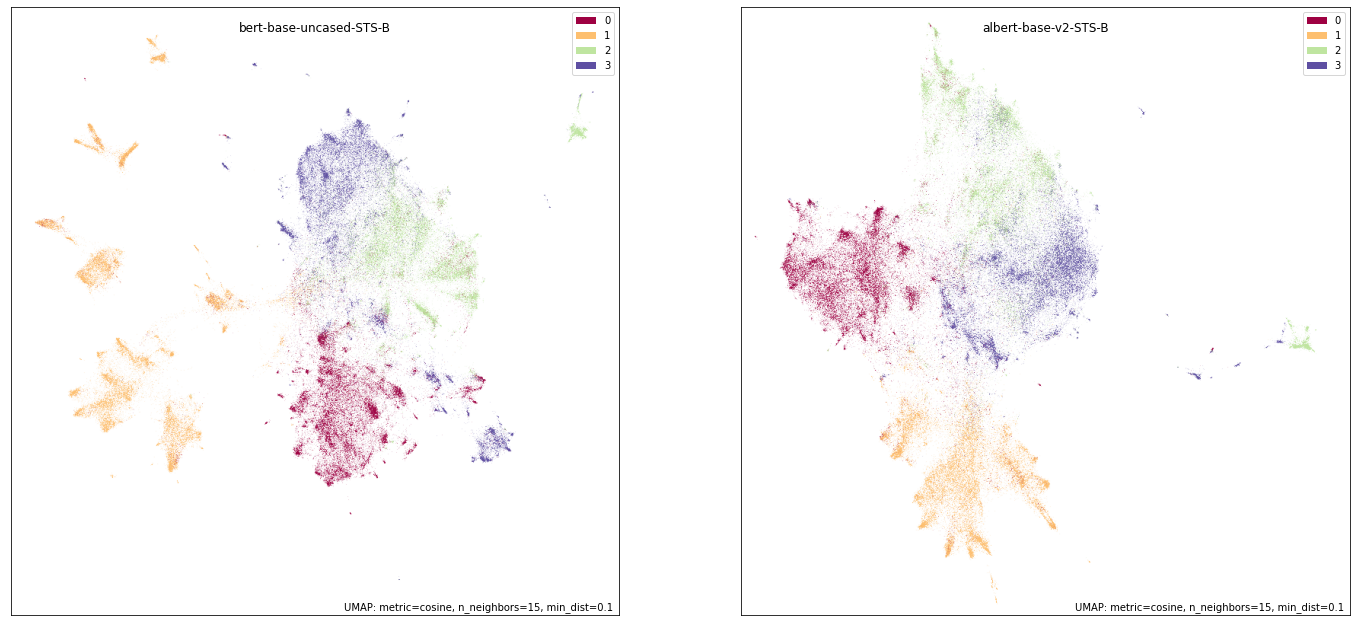

In [ ]:
fig, ax = umap.plot.plt.subplots(1, 2, figsize=(24,12))

ax[0].set_title('bert-base-uncased-STS-B', x=0.5, y=0.95)
ax[1].set_title('albert-base-v2-STS-B', x=0.5, y=0.95)

umap.plot.points(sbert_mapper, labels=df['label'], ax=ax[0])
umap.plot.points(salbert_mapper, labels=df['label'], ax=ax[1])

# AG News on AG News

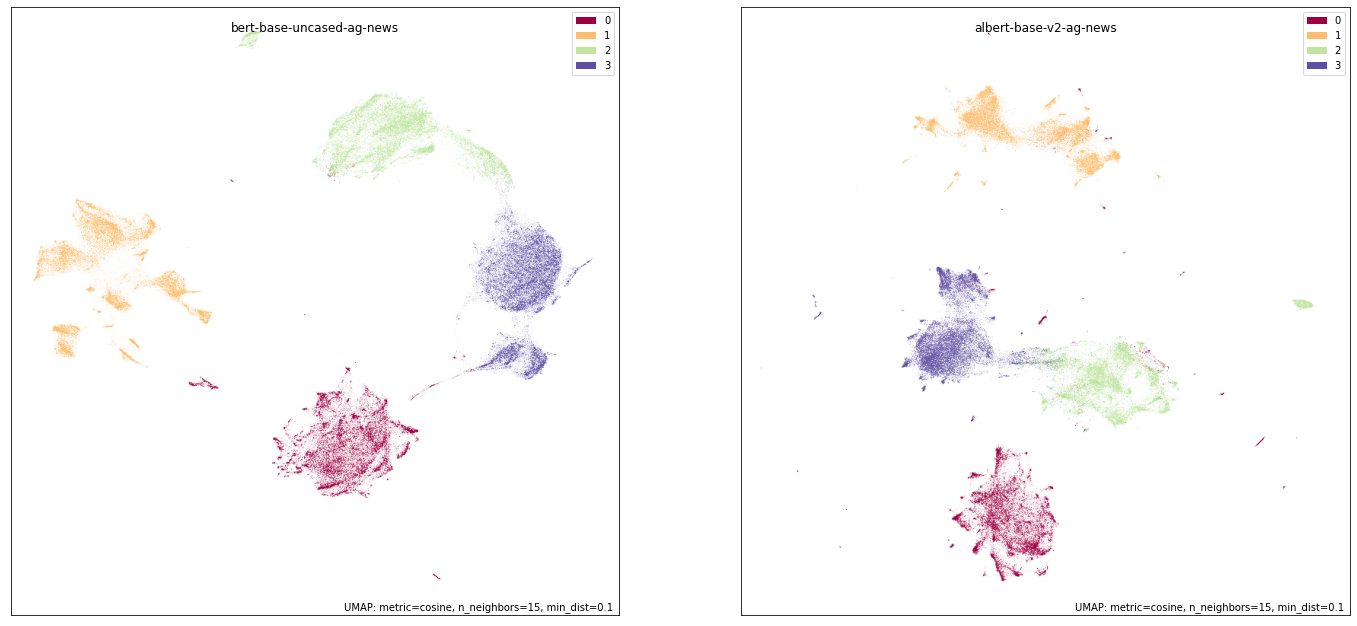

In [ ]:
fig, ax = umap.plot.plt.subplots(1, 2, figsize=(24,12))

ax[0].set_title('bert-base-uncased-ag-news', x=0.5, y=0.95)
ax[1].set_title('albert-base-v2-ag-news', x=0.5, y=0.95)

umap.plot.points(sbert_mapper, labels=df['label'], ax=ax[0])
umap.plot.points(salbert_mapper, labels=df['label'], ax=ax[1])

In [ ]:
%time intersection_mapper = sbert_mapper * salbert_mapper

CPU times: user 2min 50s, sys: 6.43 s, total: 2min 56s
Wall time: 2min 33s


In [ ]:
%time union_mapper = sbert_mapper + salbert_mapper

CPU times: user 2min 35s, sys: 5.95 s, total: 2min 41s
Wall time: 2min 18s


In [ ]:
%time contrast_mapper1 = sbert_mapper - salbert_mapper

CPU times: user 2min 30s, sys: 5.23 s, total: 2min 35s
Wall time: 1min 57s


In [ ]:
%time contrast_mapper2 = salbert_mapper - sbert_mapper

CPU times: user 1min 53s, sys: 2.56 s, total: 1min 56s
Wall time: 1min 37s


# STS-B on AG News (Combinations)

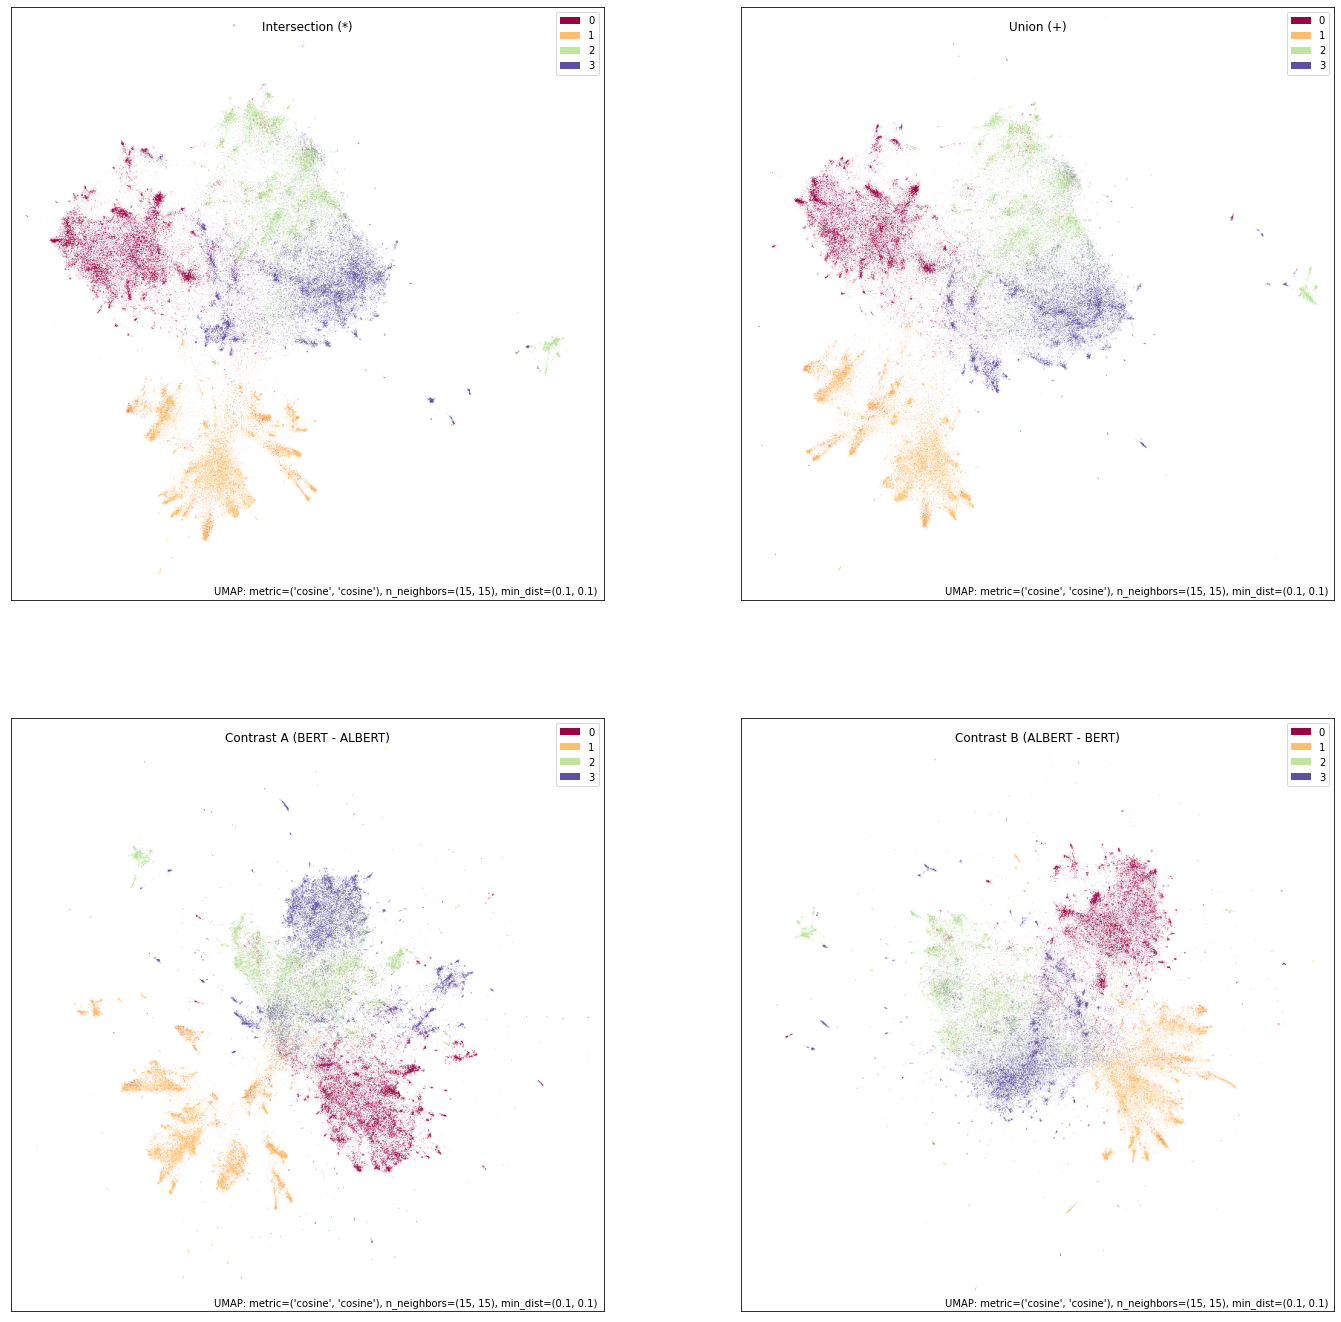

In [ ]:
fig, ax = umap.plot.plt.subplots(2, 2, figsize=(24, 24))

ax[0,0].set_title('Intersection (*)', x=0.5, y=0.95)
ax[0,1].set_title('Union (+)', x=0.5, y=0.95)
ax[1,0].set_title('Contrast A (BERT - ALBERT)', x=0.5, y=0.95)
ax[1,1].set_title('Contrast B (ALBERT - BERT)', x=0.5, y=0.95)

umap.plot.points(intersection_mapper, labels=df['label'], ax=ax[0,0])
umap.plot.points(union_mapper, labels=df['label'], ax=ax[0,1])
umap.plot.points(contrast_mapper1, labels=df['label'], ax=ax[1,0])
umap.plot.points(contrast_mapper2, labels=df['label'], ax=ax[1,1])